In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres_o.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_o.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_year.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_artist_o.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres_o.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_year_o.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv


In [2]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
pd.set_option('max_rows',1000)
sns.set(rc={'figure.figsize':(15,10)})
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor

Reading the data...

In [3]:
df = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv')
df_year = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_year.csv')
df_by_genres = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv')
df_w_genres = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv')
df_artist = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv')

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
df_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [6]:
df_artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7


In [7]:
df_by_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [8]:
df_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

# EXPLANATORY DATA ANALYSIS

<b> Data Characteristics </b>

In [10]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [11]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [12]:
df1 = df.copy()
df1['duration_ms'].head()

0    168333
1    150200
2    163827
3    422087
4    165224
Name: duration_ms, dtype: int64

converting milliseconds to seconds

In [13]:
df1['duration_ms'] = df1['duration_ms']/1000
df1.rename({'duration_ms':'duration_in_seconds'},axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   acousticness         174389 non-null  float64
 1   artists              174389 non-null  object 
 2   danceability         174389 non-null  float64
 3   duration_in_seconds  174389 non-null  float64
 4   energy               174389 non-null  float64
 5   explicit             174389 non-null  int64  
 6   id                   174389 non-null  object 
 7   instrumentalness     174389 non-null  float64
 8   key                  174389 non-null  int64  
 9   liveness             174389 non-null  float64
 10  loudness             174389 non-null  float64
 11  mode                 174389 non-null  int64  
 12  name                 174389 non-null  object 
 13  popularity           174389 non-null  int64  
 14  release_date         174389 non-null  object 
 15  speechiness      

**Data Visualizations**

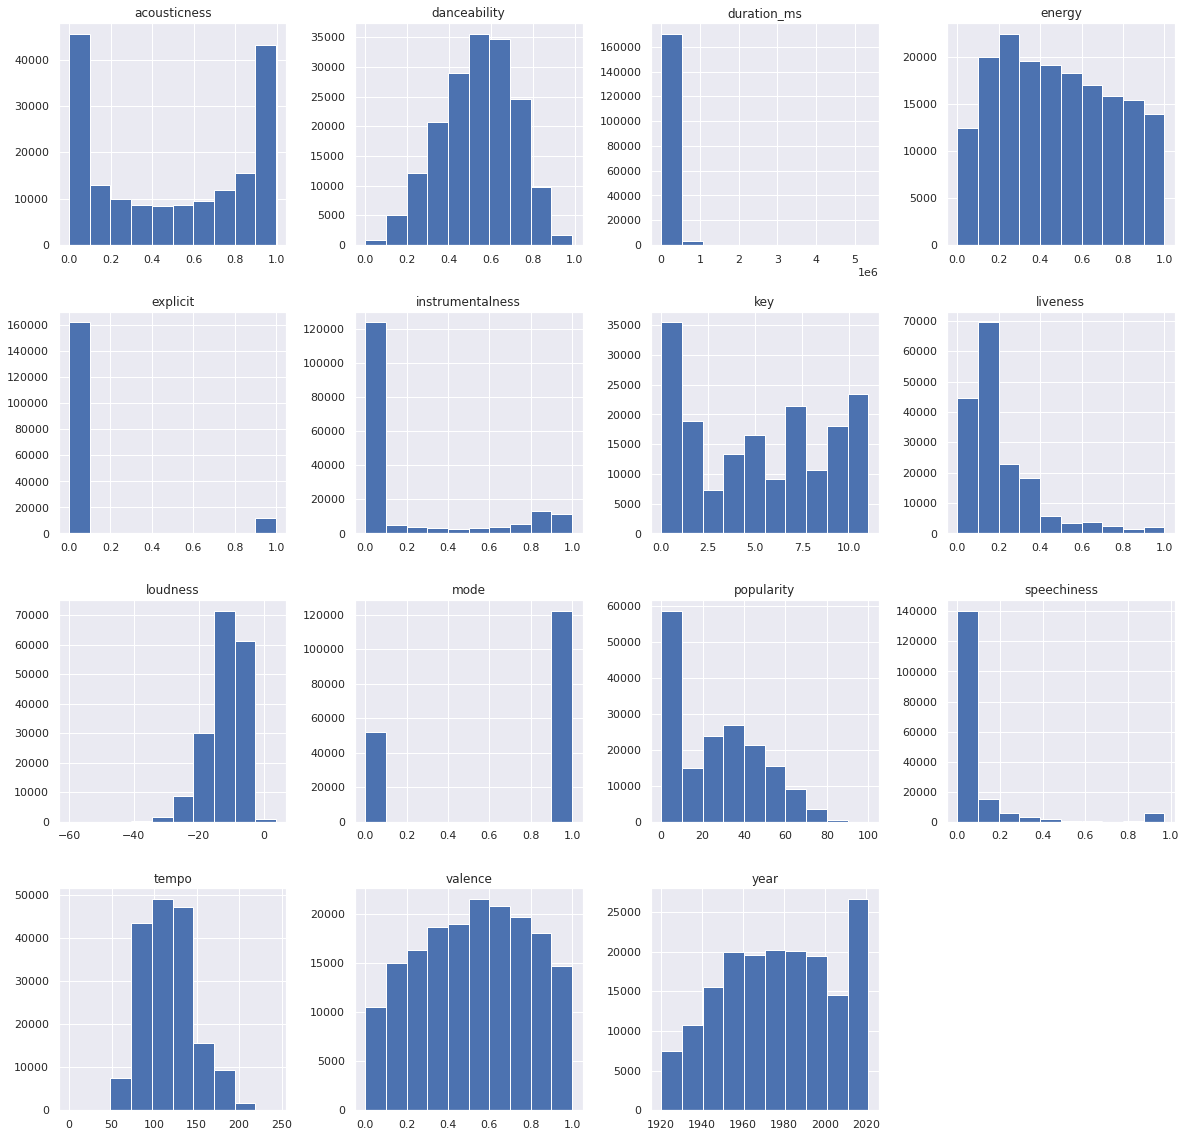

In [14]:
df.hist(figsize=(20,20))
plt.show()

Let us plot the histogram of necessary features

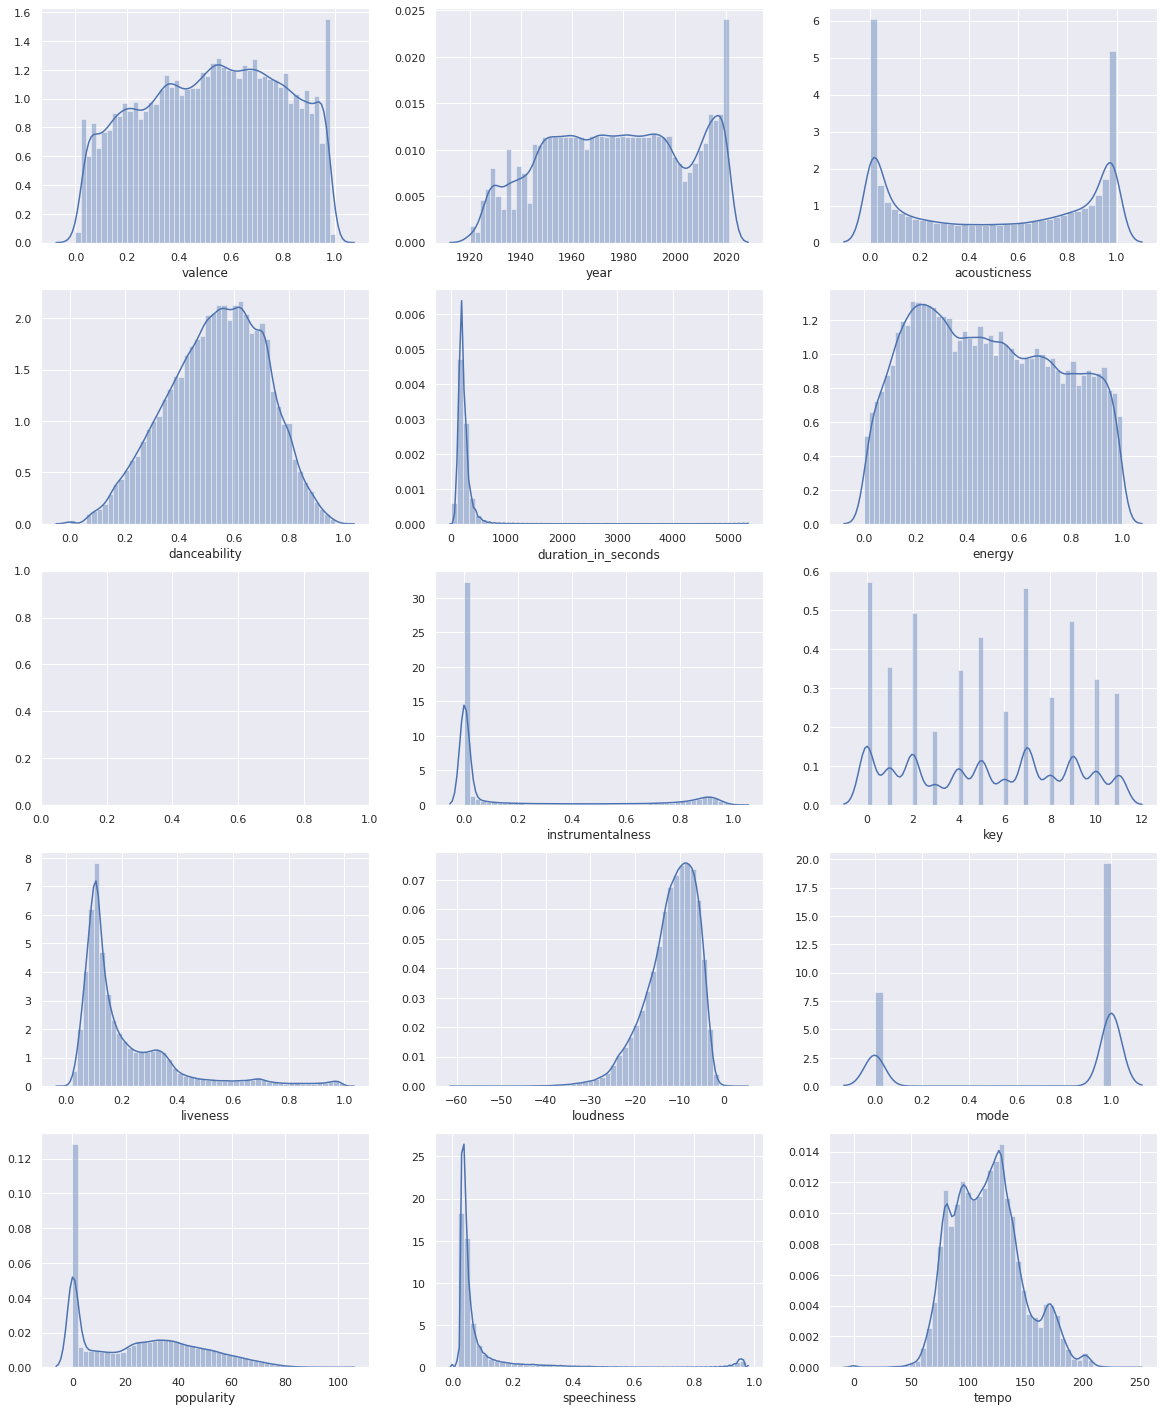

In [15]:
fig,ax = plt.subplots(5,3,figsize=(20,25))
sns.distplot(df1['valence'],ax=ax[0,0])
sns.distplot(df1['year'],ax=ax[0,1])
sns.distplot(df1['acousticness'],ax=ax[0,2])
sns.distplot(df1['danceability'],ax=ax[1,0])
sns.distplot(df1['duration_in_seconds'],ax=ax[1,1])
sns.distplot(df1['energy'],ax=ax[1,2])
#sns.distplot(df1['explicit'],ax=ax[2,0])
sns.distplot(df1['instrumentalness'],ax=ax[2,1])
sns.distplot(df1['key'],ax=ax[2,2])
sns.distplot(df1['liveness'],ax=ax[3,0])
sns.distplot(df1['loudness'],ax=ax[3,1])
sns.distplot(df1['mode'],ax=ax[3,2])
sns.distplot(df1['popularity'],ax=ax[4,0])
sns.distplot(df1['speechiness'],ax=ax[4,1])
sns.distplot(df1['tempo'],ax=ax[4,2])

Plotting the corelation matrix

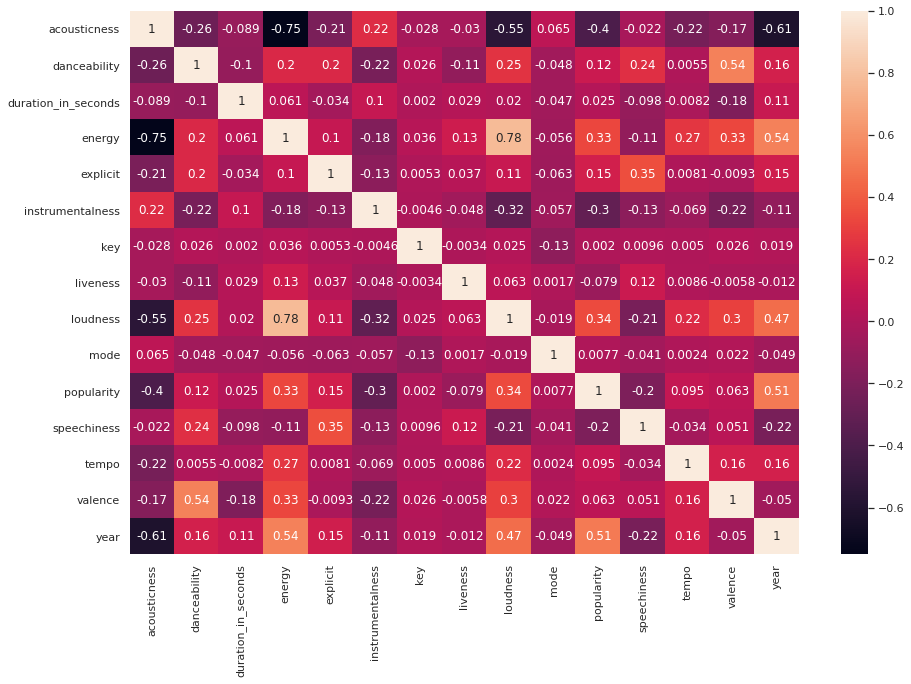

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

Visualising the top tracks by Popularity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

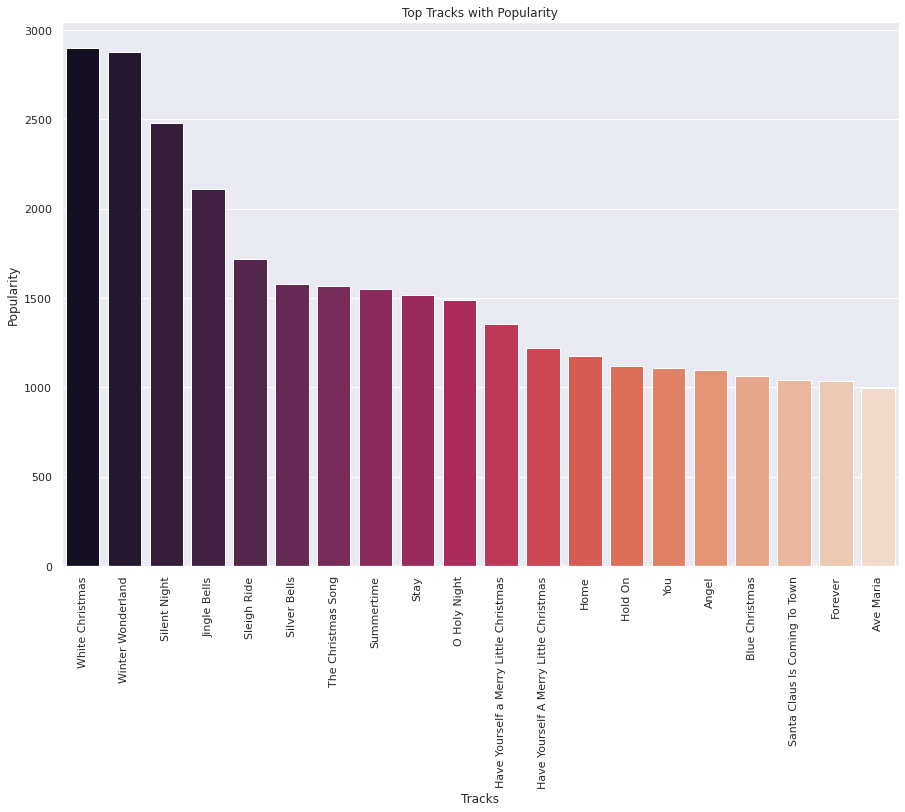

In [17]:
g_pn = df1.groupby("name")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(g_pn.index, g_pn,palette='rocket')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

Visualising the top artists by Popularity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

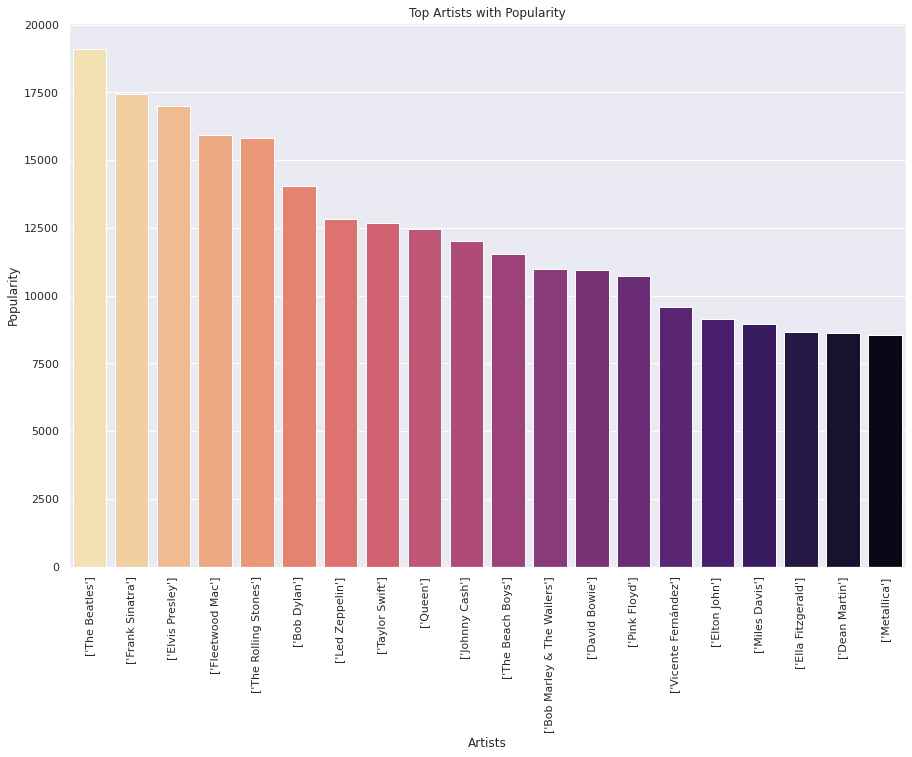

In [18]:
g_ap = df1.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(g_ap.index, g_ap,palette='magma_r')
axis.set_title('Top Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)

Let us now visualise how differnt audio characteristics have changed over time.

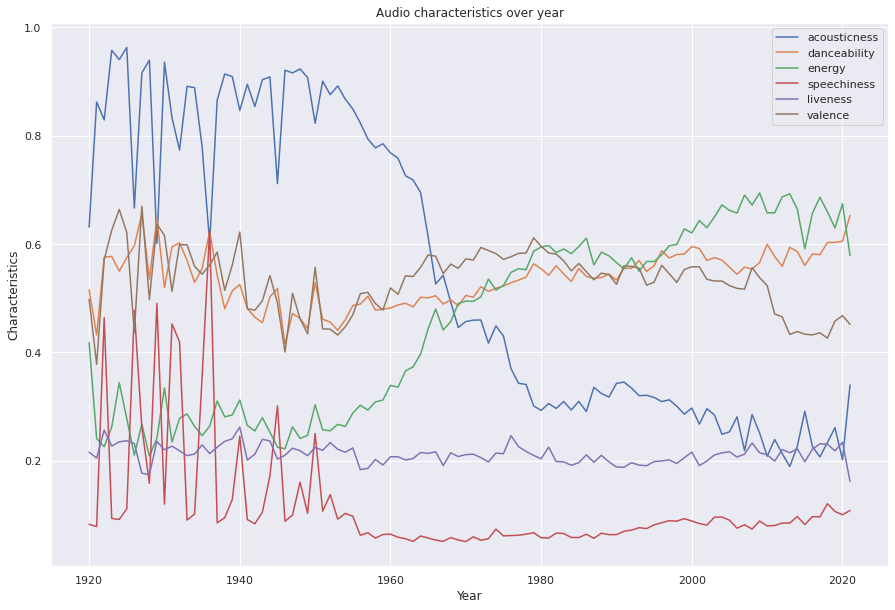

In [19]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(15,10))
for c in columns:
    x = df1.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over year')
plt.xlabel('Year')
plt.ylabel('Characteristics')
plt.show()

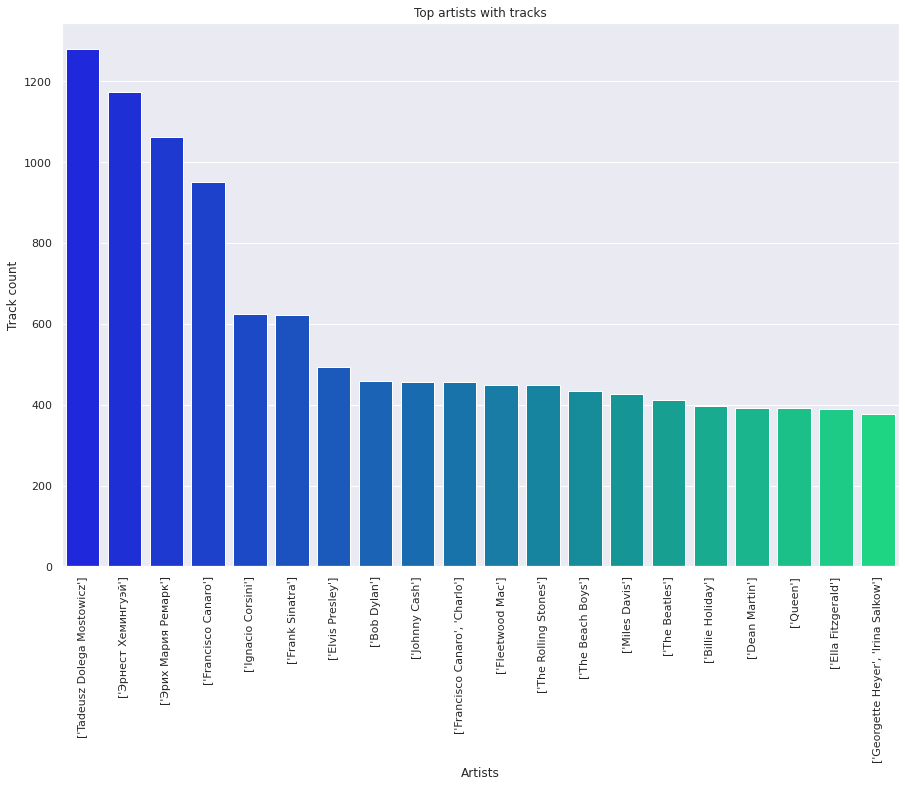

In [20]:
g_an = df1.groupby('artists')['name'].count().sort_values(ascending=False)[:20]
axis = sns.barplot(g_an.index, g_an,palette='winter')
axis.set_title('Top artists with tracks')
axis.set_ylabel('Track count')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

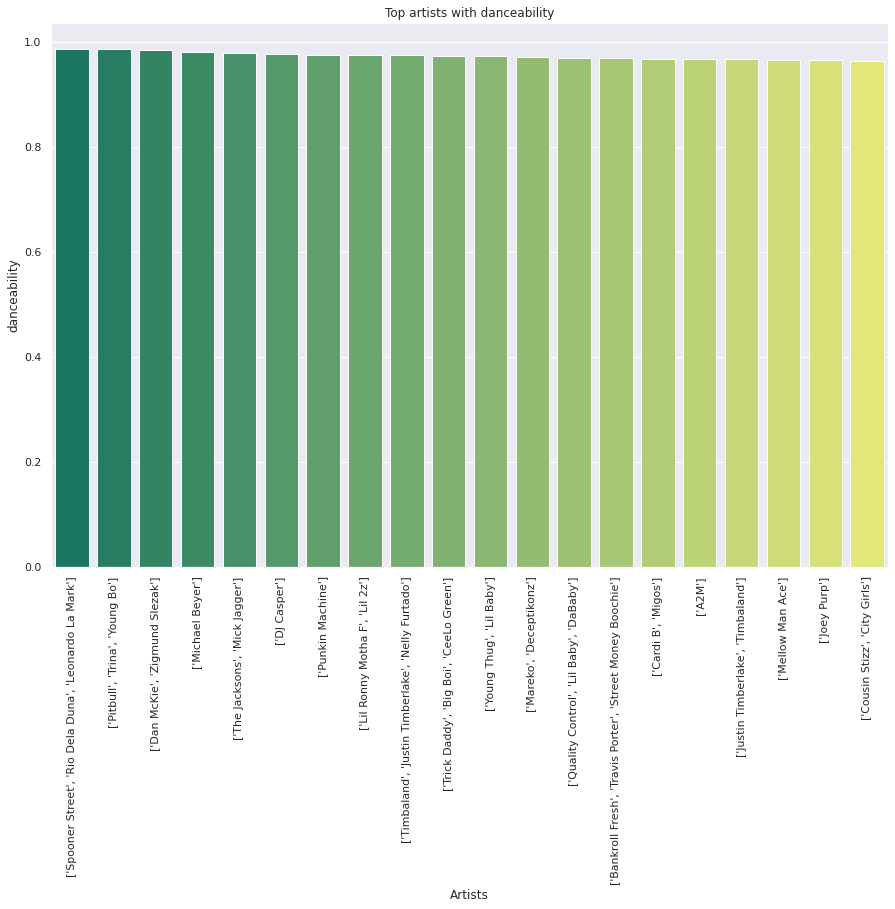

In [21]:
g_an = df1.groupby('artists')['danceability'].mean().sort_values(ascending=False)[:20]
axis = sns.barplot(g_an.index, g_an,palette='summer')
axis.set_title('Top artists with danceability')
axis.set_ylabel('danceability')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

In [22]:
df1['year'].describe()

count    174389.000000
mean       1977.061764
std          26.907950
min        1920.000000
25%        1955.000000
50%        1977.000000
75%        1999.000000
max        2021.000000
Name: year, dtype: float64

I will now group the years into bins to get an idea about different eras of music

In [23]:
bins = [1920,1960,2000,2020]
df1['year_bins'] = pd.cut(df1['year'],bins,labels=['20s-60s','60s-2000','2000-2020'])
df1['year_bins'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: year_bins, dtype: category
Categories (3, object): ['20s-60s' < '60s-2000' < '2000-2020']

In [24]:
df1['year_bins'].value_counts()

60s-2000     79296
20s-60s      53539
2000-2020    39365
Name: year_bins, dtype: int64

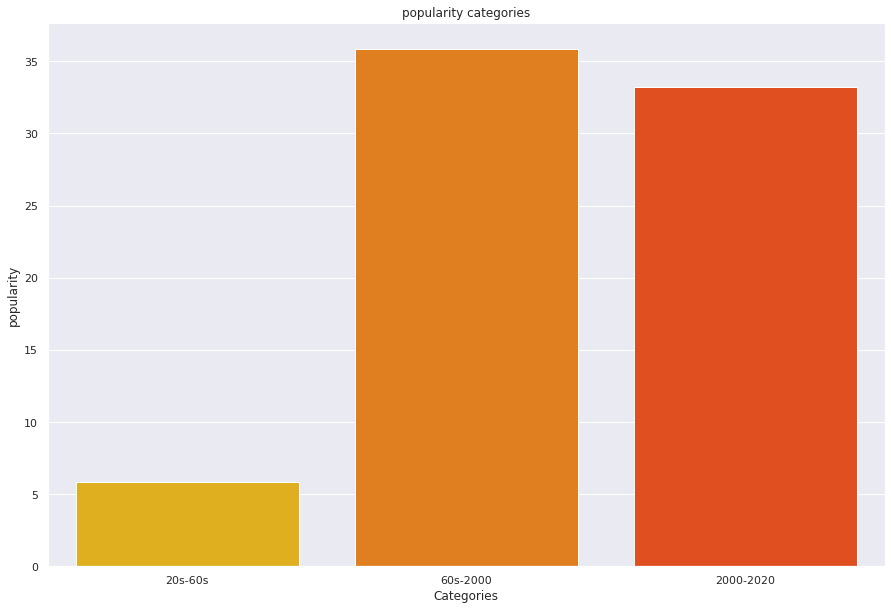

In [25]:
g_yp = df1.groupby('year_bins')['popularity'].mean().sort_values(ascending=False)[:20]
axis = sns.barplot(g_yp.index, g_yp,palette='autumn_r')
axis.set_title('popularity categories')
axis.set_xlabel('Categories')
axis.set_ylabel('popularity')
#plt.xticks(rotation = 90)
plt.show()

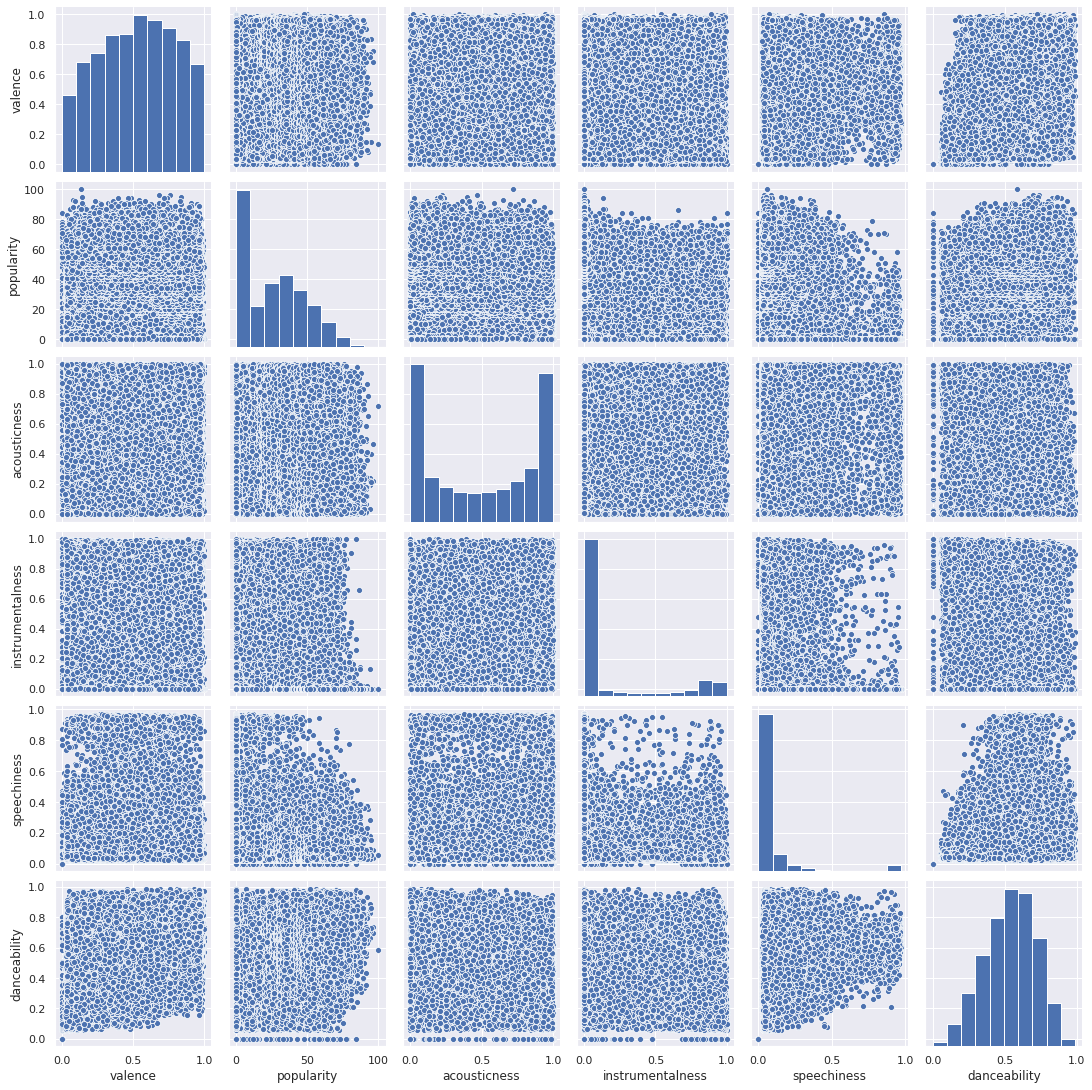

In [26]:
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df1[cols])
plt.show()

In [27]:
df1.columns

Index(['acousticness', 'artists', 'danceability', 'duration_in_seconds',
       'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness',
       'tempo', 'valence', 'year', 'year_bins'],
      dtype='object')

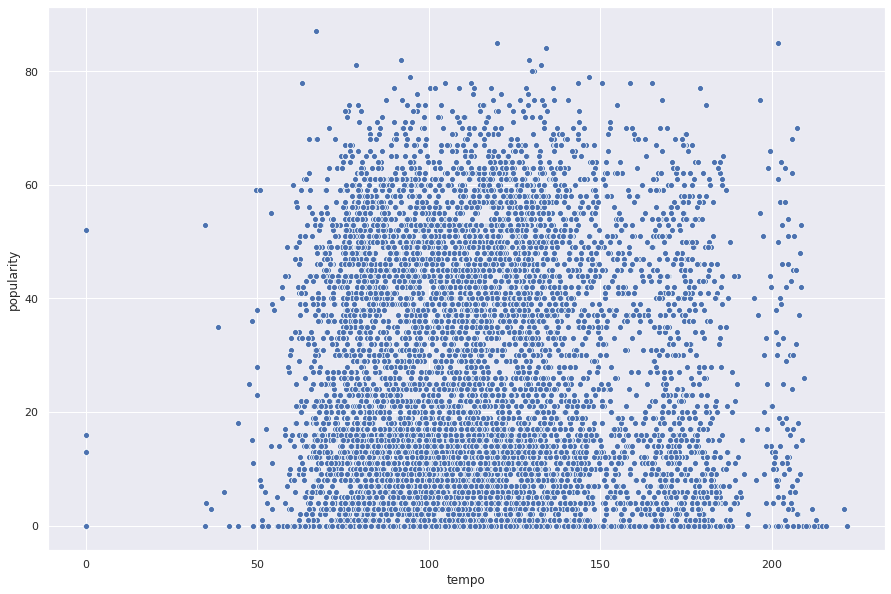

In [28]:
plt.figure()
d = df1[:10000]
sns.scatterplot('tempo','popularity',data=d)
plt.show()

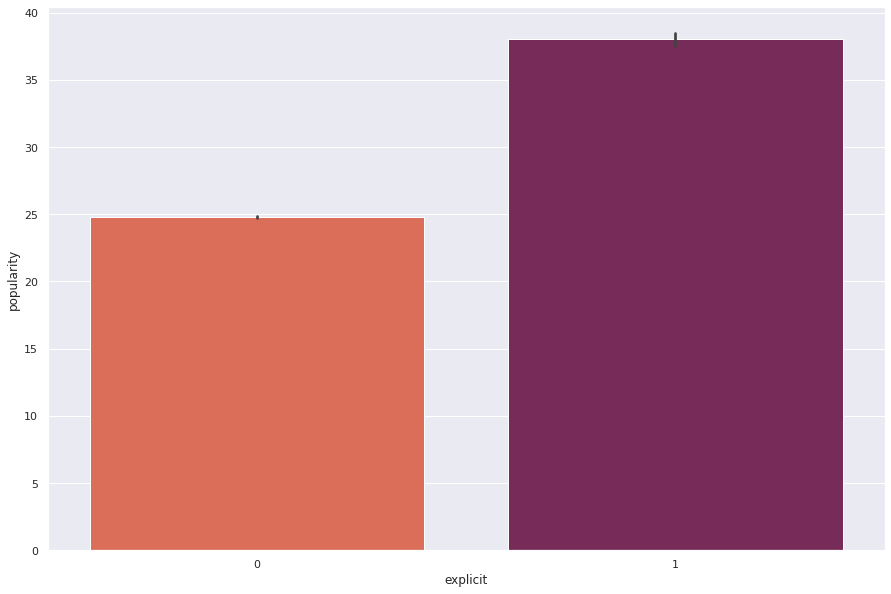

In [29]:
plt.figure()
sns.barplot('explicit','popularity',data=df1,palette='rocket_r')
plt.show()

Songs with explicit lyrics are more popular which somehow does not come off as a surprise...

Wordcloud Visualisation for Artist names in top 50 songs

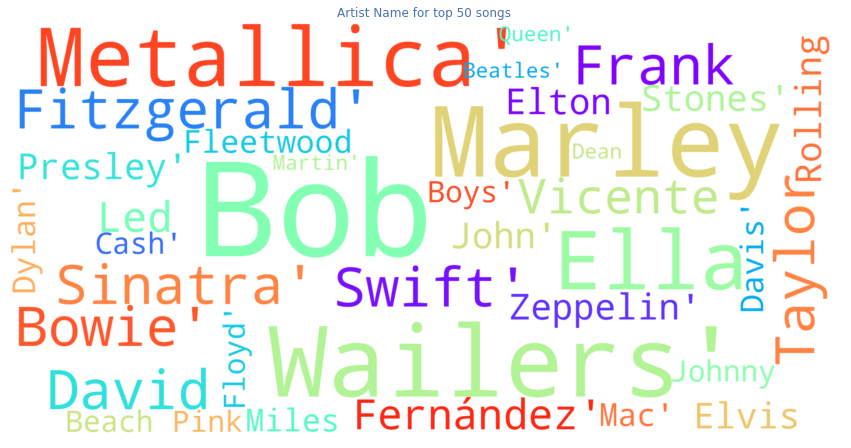

In [30]:
wrds1 = g_ap.index.str.split("(").str[0].value_counts().keys()
wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='b')
plt.show()

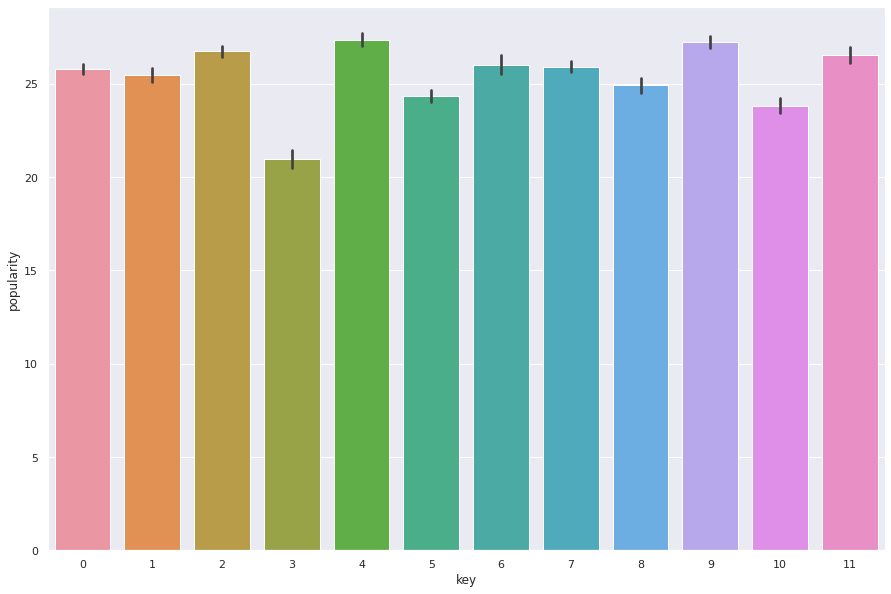

In [31]:
sns.barplot('key','popularity',data=df1)
plt.show()

# ML AND MODELLING

In [32]:
enc = LabelEncoder()
df1['Artist_enc'] = enc.fit_transform(df1['artists'])
df1['name_enc'] = enc.fit_transform(df1['name'])
df1['year_bins'] = df1['year_bins'].map({'20s-60s':0,'60s-2000':1,'2000-2020':2})
#print(df1['Artist_enc'].value_counts(),df1['name_enc'].value_counts())
df1.head(10)

,acousticness,artists,danceability,duration_in_seconds,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,year_bins,Artist_enc,name_enc
0,0.991000,['Mamie Smith'],0.598,168.333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,...,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,NaN,21071,60319
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150.200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,...,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,NaN,303,51026
2,0.993000,['Mamie Smith'],0.647,163.827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,...,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,NaN,21071,42480
3,0.000173,['Oscar Velazquez'],0.730,422.087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,...,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,NaN,24517,119575
4,0.295000,['Mixe'],0.704,165.224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,...,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,NaN,22782,129404
5,0.996000,['Mamie Smith & Her Jazz Hounds'],0.424,198.627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,...,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920,NaN,21068,24885
6,0.992000,['Mamie Smith'],0.782,195.200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,...,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920,NaN,21071,30678
7,0.996000,['Mamie Smith & Her Jazz Hounds'],0.474,186.173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,...,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920,NaN,21068,8799
8,0.996000,['Francisco Canaro'],0.469,146.840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,...,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920,NaN,11027,62207
9,0.006820,['Meetya'],0.571,476.304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,...,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920,NaN,22081,15862


There are a lot of rows in the dataset so I'll only take the first 30,000.

In [33]:
cols = ['valence', 'Artist_enc', 'danceability','acousticness','instrumentalness',
       'duration_in_seconds', 'energy', 'explicit',
        'loudness', 'name_enc', 'tempo', 'year_bins']
X = df1[cols]
y = df1['popularity']
X = X[:30000]
y = y[:30000]
print(X.shape,y.shape)

(30000, 12) (30000,)


Lets split the dataset into training and test sets.

In [34]:
X['year_bins'].fillna(method='bfill',axis=0,inplace=True)
X['year_bins'].isna().sum()

0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22500, 12) (7500, 12) (22500,) (7500,)


Scaling using StandardScalar

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#models
rf = RandomForestRegressor(criterion='mse',random_state=42,bootstrap=True,
                           n_estimators=1000,n_jobs=-1)
xgb = XGBRegressor( booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=4, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)
xgb0 = XGBRegressor()
gbr = GradientBoostingRegressor( learning_rate=0.01,) 
dtr = DecisionTreeRegressor(criterion='mse',random_state=42,max_depth=35,
                           max_features='sqrt', min_samples_leaf=15, min_samples_split=10)
abr = AdaBoostRegressor(dtr,learning_rate=0.01)
cat =  CatBoostRegressor(learning_rate=0.1,eval_metric = 'RMSE',verbose=0)
lgb = LGBMRegressor()

In [38]:
xgb0.fit(X_train,y_train)
xgb_pred0 = xgb0.predict(X_train)
xgb_pred = xgb0.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,xgb_pred0)),mean_absolute_error(y_train,xgb_pred0))
print(np.sqrt(mean_squared_error(y_test,xgb_pred)),mean_absolute_error(y_test,xgb_pred))

8.987651654820208 6.51649238405625
12.028650834051172 8.595975151399772


In [39]:
rf.fit(X_train,y_train)
rf_pred0 = rf.predict(X_train)
rf_pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,rf_pred0)),mean_absolute_error(y_train,rf_pred0))
print(np.sqrt(mean_squared_error(y_test,rf_pred)),mean_absolute_error(y_test,rf_pred))

4.608229848895176 3.2450281949131625
12.278511049735132 8.600778756093906


In [40]:
lgb.fit(X_train,y_train)
lgb_pred0 = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,lgb_pred0)),mean_absolute_error(y_train,lgb_pred0))
print(np.sqrt(mean_squared_error(y_test,lgb_pred)),mean_absolute_error(y_test,lgb_pred))

11.237457601746824 8.261814474545838
12.508602415519094 8.971086232426561


In [41]:
dtr.fit(X_train,y_train)
dtr_pred0 = dtr.predict(X_train)
dtr_pred = dtr.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,dtr_pred0)),mean_absolute_error(y_train,dtr_pred0))
print(np.sqrt(mean_squared_error(y_test,dtr_pred)),mean_absolute_error(y_test,dtr_pred))

12.437879420254395 8.703612073852746
14.680849918072873 10.3047041609525


In [42]:
gbr.fit(X_train,y_train)
gbr_pred0 = gbr.predict(X_train)
gbr_pred = gbr.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,gbr_pred0)),mean_absolute_error(y_train,gbr_pred0))
print(np.sqrt(mean_squared_error(y_test,gbr_pred)),mean_absolute_error(y_test,gbr_pred))

16.87639493979416 14.385507532283349
16.77642135278637 14.355359075264007


In [43]:
abr.fit(X_train,y_train)
abr_pred0 = abr.predict(X_train)
abr_pred = abr.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,abr_pred0)),mean_absolute_error(y_train,abr_pred0))
print(np.sqrt(mean_squared_error(y_test,abr_pred)),mean_absolute_error(y_test,abr_pred))

10.151065978485308 7.127938734141246
12.77927758794214 8.90818550220025


In [44]:
cat.fit(X_train,y_train)
cat_pred = cat.predict(X_test)
cat_pred0 = cat.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,cat_pred0)),mean_absolute_error(y_train,cat_pred0))
print(np.sqrt(mean_squared_error(y_test,cat_pred)),mean_absolute_error(y_test,cat_pred))

9.411020371761015 6.918095909677509
12.0225306351938 8.620192775296733


Taking the Predicted mean of best models...

In [45]:
output = pd.DataFrame({'Actual_Popularity':y_test,'Predicted_mean':np.round((cat_pred+xgb_pred)/2,2)})
output.head(10)

,Actual_Popularity,Predicted_mean
2308,4,13.63
22404,0,8.45
23397,0,0.03
25058,0,12.93
2664,31,11.96
8511,55,49.94
5148,11,12.25
7790,42,26.17
11311,59,60.36
19043,10,65.84


In [46]:
output.to_csv('output.csv',index=False)